Для обучения модели линейной регрессии нужно понять, какие факторы в нашей базе данных влияют на переменную RiskScore, а так же отфильтровать вбросы и убрать NaN

Подргружаем библиотеки

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

Загрузим данные и уберём значения NaN

In [98]:
train_df = pd.read_csv('train.csv').dropna()
test_df = pd.read_csv('test.csv').dropna()

Уберём выбросы и аномалии. Для начала проверим столбец RiskScore

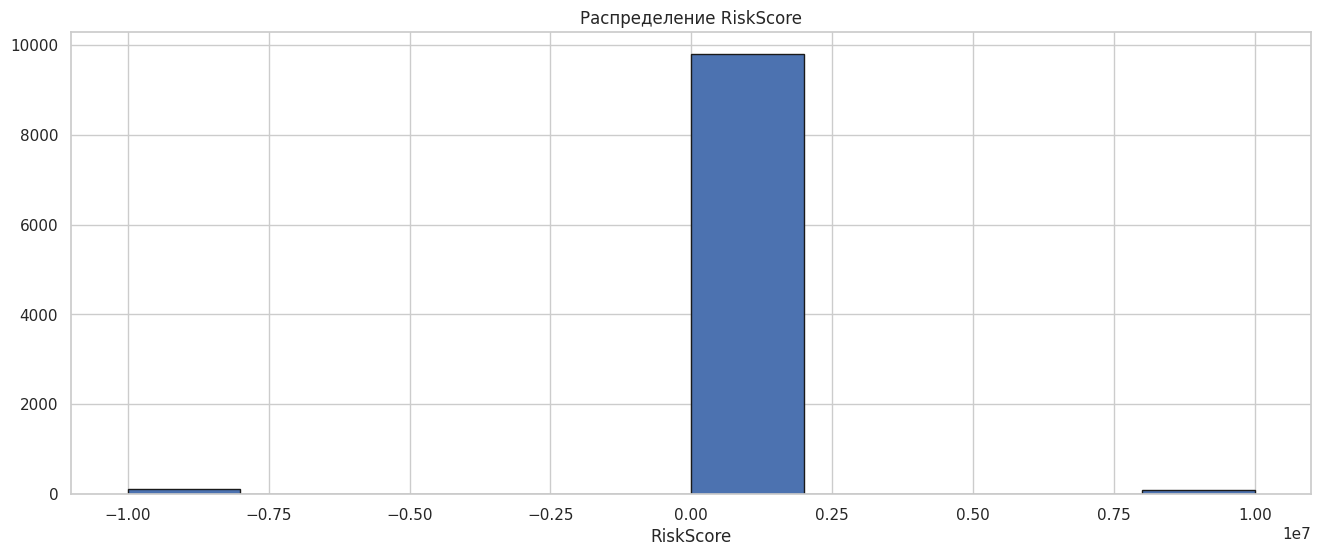

In [99]:
plt.figure(figsize=(16,6))
plt.hist(train_df['RiskScore'], ec='k')
plt.title('Распределение RiskScore')
plt.xlabel('RiskScore')
plt.show()

Значения RiskScore больше 100 и меньше 0 можем удалить, а потом построим график

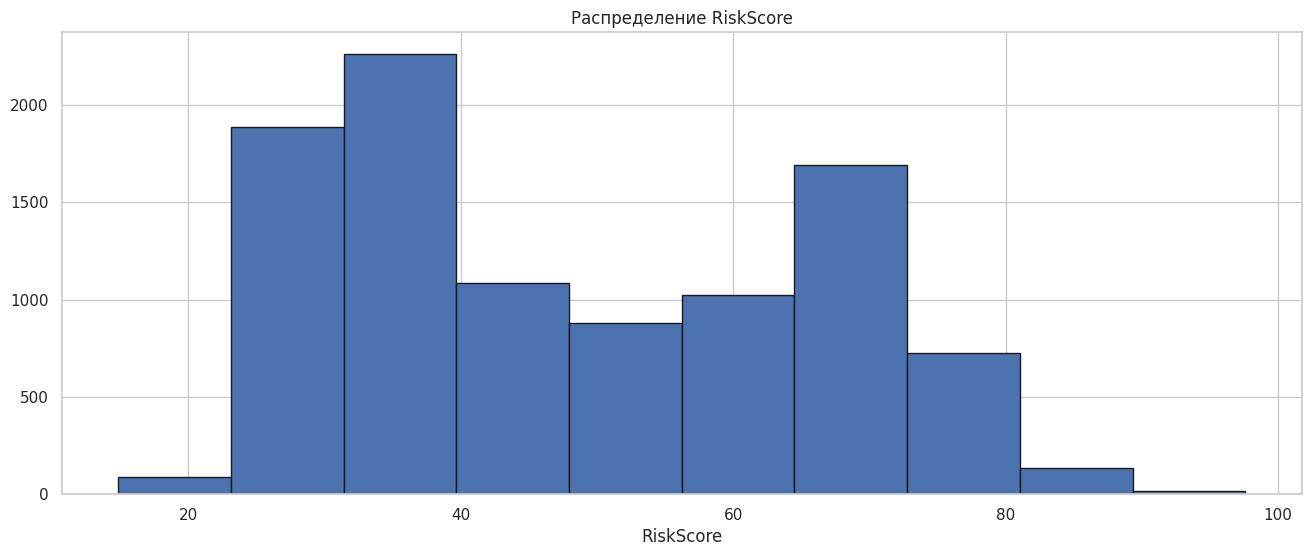

In [100]:
train_df = train_df[(train_df['RiskScore'] >= 0) & (train_df['RiskScore'] <= 99)]

plt.figure(figsize=(16,6))
plt.hist(train_df['RiskScore'], ec='k')
plt.title('Распределение RiskScore')
plt.xlabel('RiskScore')
plt.show()

Далее смотрим анализируем влияние категориальных признаков на целевую переменную. Построим несколько графиков:

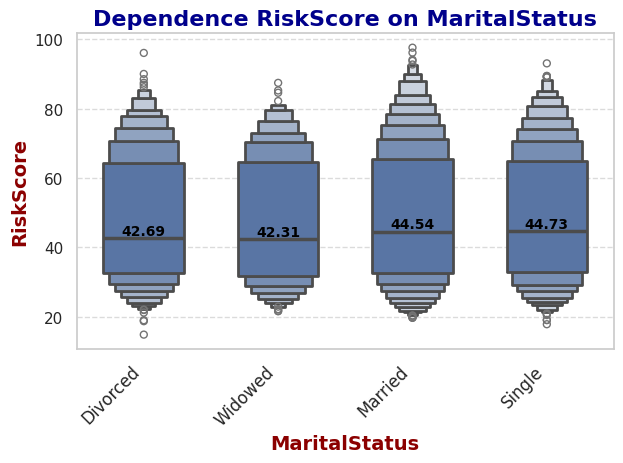

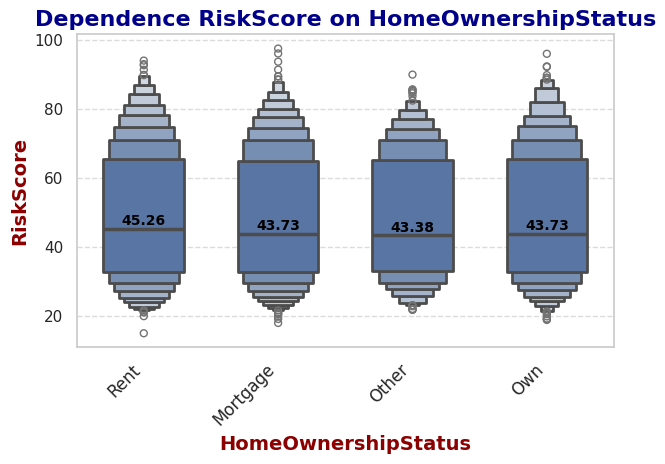

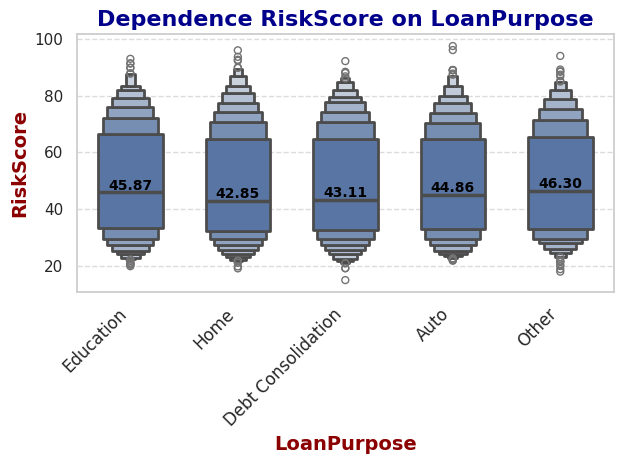

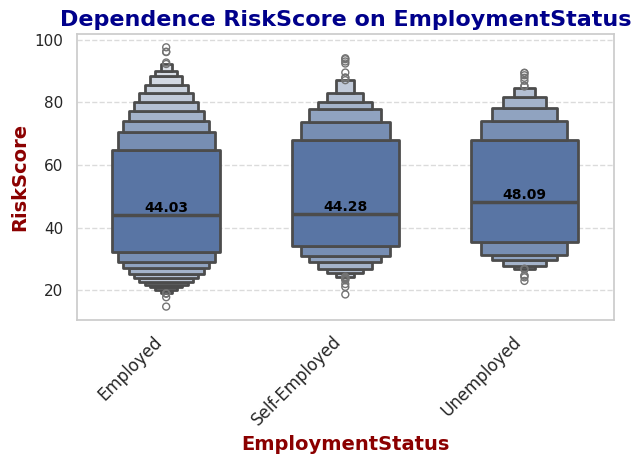

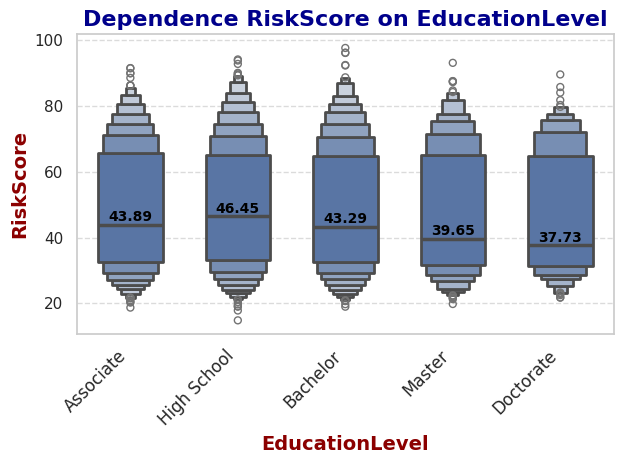

In [101]:
for col in ['MaritalStatus', 'HomeOwnershipStatus', 'LoanPurpose', 'EmploymentStatus', 'EducationLevel']:
    sns.boxenplot(x=col, y='RiskScore', data=train_df, width_method='linear',
                  linewidth=2, width=0.6, k_depth='tukey', dodge=True)
    
    plt.title(f'Dependence RiskScore on {col}', fontsize=16, fontweight='bold', color='darkblue')
    plt.xlabel(col, fontsize=14, fontweight='bold', color='darkred')
    plt.ylabel('RiskScore', fontsize=14, fontweight='bold', color='darkred')
    
    plt.xticks(rotation=45, fontsize=12, ha='right')
    
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    for i in range(len(train_df[col].unique())):
        median = train_df[train_df[col] == train_df[col].unique()[i]]['RiskScore'].median()
        plt.text(i, median + 1, f'{median:.2f}', color='black', ha='center', fontsize=10, fontweight='bold')
    plt.tight_layout()
    plt.show()

Как можем заметить, категориальные признаки можно удалить, так как влияния на RiskScore они не дают

Также неплохо бы узнать, как сильно влияет дата на RiskScore

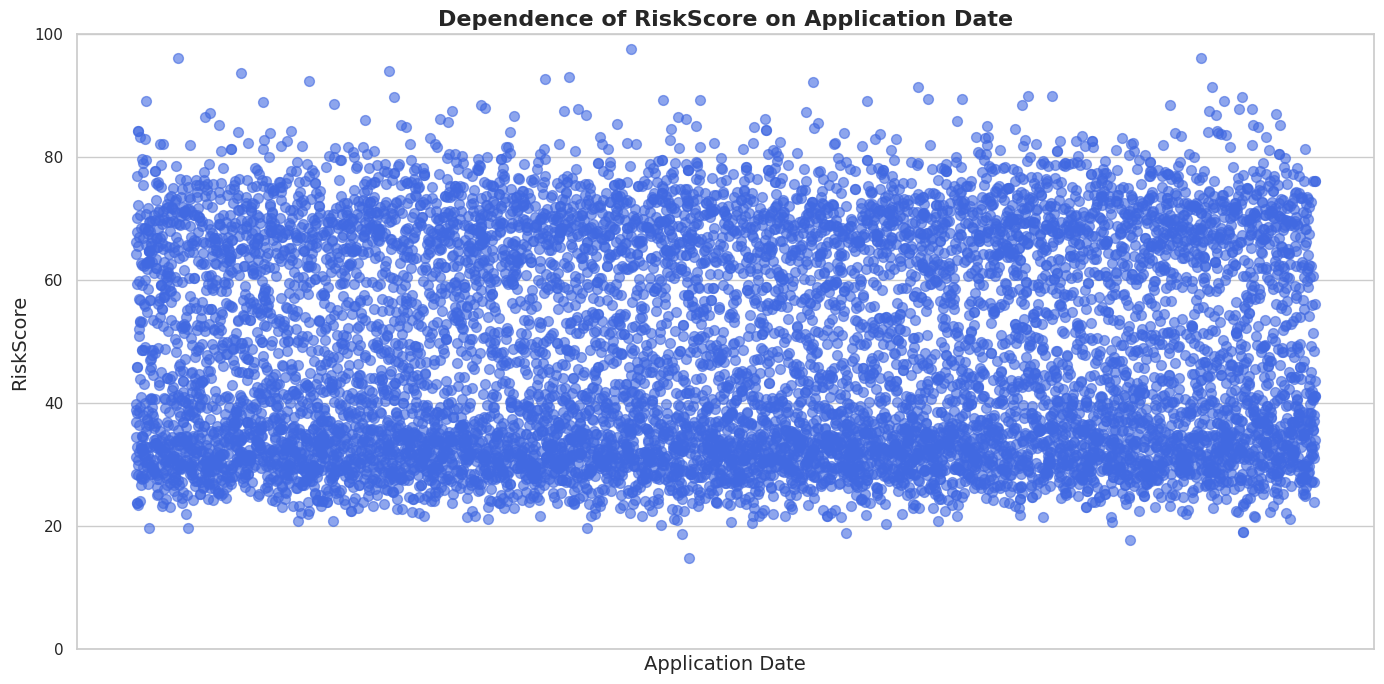

In [102]:
plt.figure(figsize=(14, 7))
plt.scatter(train_df['ApplicationDate'], train_df['RiskScore'], color='royalblue', alpha=0.6, s=50)

plt.title('Dependence of RiskScore on Application Date', fontsize=16, fontweight='bold')
plt.xlabel('Application Date', fontsize=14)
plt.ylabel('RiskScore', fontsize=14)

plt.xticks([])
plt.ylim(0, 100)

plt.tight_layout()
plt.grid(True)
plt.show()

Как видно, точки распределены довольно равномерно, а значит ApplicationDate тоже можно убрать. Итого получается, что убраны категориальные признаки и даты.

In [103]:
columns_to_drop = ['ApplicationDate', 'MaritalStatus', 'HomeOwnershipStatus', 
                   'LoanPurpose', 'EmploymentStatus', 'EducationLevel']
train_df = train_df.drop(columns=columns_to_drop)
test_df = test_df.drop(columns=columns_to_drop)

Делим данные на признаки (Х) и целевую переменную (Y), а также разделяем данные на обучающие и тестовый наборы с помощью train_test_split.

In [104]:
X = train_df.drop(columns=['RiskScore'])
y = train_df['RiskScore']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Создаём и обучаем модель

In [107]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Далее готовим тестовый датасет для предсказания и сохраняем результаты

In [109]:
test_df = pd.read_csv('test.csv').dropna()
test_ids = test_df['ID']
test_df = test_df.drop(columns=columns_to_drop + ['ID'])
test_df = test_df.reindex(columns=X.columns, fill_value=0)

predictions = model.predict(test_df)
output_df = pd.DataFrame({'ID': test_ids, 'RiskScore': predictions})
output_df.to_csv('submission.csv', index=False)